In [1]:
# import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:
# import dataset
charity_df = pd.read_csv('Resources/charity_data.csv')
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


## Preprocessing

### Binning

In [3]:
# summarize df
charity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [4]:
# inspect STATUS column
charity_df['STATUS'].value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [5]:
# remove active status, does not add any info
charity_df = charity_df.drop(columns=['STATUS'])

In [6]:
# unnecessary ID columns, drop name & EIN
charity_df = charity_df.drop(columns=['NAME', 'EIN'])

In [7]:
# generate categorical variable list
charity_cat = charity_df.dtypes[charity_df.dtypes == 'object'].index.tolist()

In [8]:
# check number of unique values in each column
charity_df[charity_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [9]:
# examine application type 
application_types = charity_df['APPLICATION_TYPE'].value_counts()
application_types

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

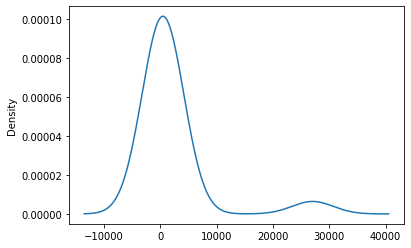

In [10]:
# visualize value counts
application_types.plot.density()

In [11]:
# gather types with less than 200 applications
replace_types = list(application_types[application_types < 200].index)

# replace types in dataframe
for application in replace_types:
    charity_df.APPLICATION_TYPE = charity_df.APPLICATION_TYPE.replace(application, 'Other')

# confirm binning
charity_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [12]:
# inspect CLASSIFICATION column
classification_counts = charity_df['CLASSIFICATION'].value_counts()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(classification_counts)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1278       10
C1238       10
C1235        9
C1237        9
C7210        7
C2400        6
C4100        6
C1720        6
C1600        5
C1257        5
C0           3
C1260        3
C2710        3
C1256        2
C1267        2
C1234        2
C1246        2
C3200        2
C1570        1
C2500        1
C2561        1
C2600        1
C1236        1
C1245        1
C1248        1
C2170        1
C1580        1
C1370        1
C2570        1
C6100        1
C2150        1
C1732        1
C1900        1
C4120        1
C1728        1
C5200        1
C8210        1
C1820        1
C3700        1
C2190     

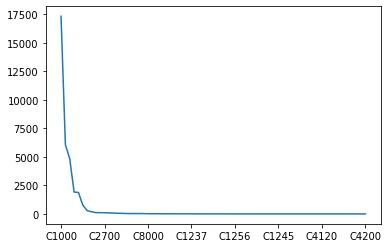

In [13]:
# visualize count values
classification_counts.plot()

In [14]:
# create list of classification with less than 150 data points
replace_classifications = list(classification_counts[classification_counts < 150].index)

# replace in dataframe
for classification in replace_classifications:
    charity_df.CLASSIFICATION = charity_df.CLASSIFICATION.replace(classification, 'Other')
    
# confirm binning was successful
charity_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1003
C7000      777
C1700      287
C4000      194
Name: CLASSIFICATION, dtype: int64

In [15]:
# recheck number of unique values in each column
charity_cat = charity_df.dtypes[charity_df.dtypes == 'object'].index.tolist()
charity_df[charity_cat].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            9
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

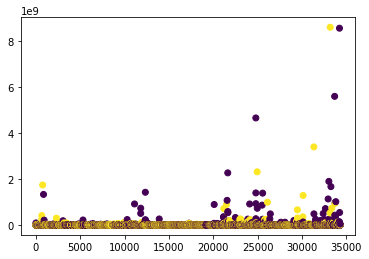

In [16]:
# examine ASK_AMT column for outliers
plt.scatter(x=charity_df.index, y=charity_df.ASK_AMT, c=charity_df.IS_SUCCESSFUL)

### Encoding

In [17]:
# create OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# fit and transform encoder using categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(charity_df[charity_cat]))

In [18]:
# add encoded variables to dataframe
encode_df.columns = enc.get_feature_names(charity_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
# merge encoded features and drop originals
charity_df = charity_df.merge(encode_df, left_index=True, right_index=True)
charity_df = charity_df.drop(charity_cat, 1)
charity_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Scaling

In [20]:
# separate target and features
y = charity_df.IS_SUCCESSFUL.values
X = charity_df.drop(columns=['IS_SUCCESSFUL'])

In [21]:
# split into training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [22]:
# create scaler instance
scaler = StandardScaler()

# fit scaler
X_scaler = scaler.fit(X_train)

In [23]:
# scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Build Model

In [24]:
# define params for dnn model
num_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 32
hidden_nodes_layer2 = 16

nn = tf.keras.models.Sequential()

In [25]:
# create first hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=num_input_features, activation='relu'))

# create second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='sigmoid'))

# create output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [26]:
# view model summary
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1472      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 2,017
Trainable params: 2,017
Non-trainable params: 0
_________________________________________________________________


In [27]:
# compile model and customize metrics
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
# train model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 3s 100us/sample - loss: 0.5819 - accuracy: 0.7090
Epoch 2/50
25724/25724 [==============================] - 2s 63us/sample - loss: 0.5553 - accuracy: 0.7291
Epoch 3/50
25724/25724 [==============================] - 2s 62us/sample - loss: 0.5523 - accuracy: 0.7319
Epoch 4/50
25724/25724 [==============================] - 2s 62us/sample - loss: 0.5506 - accuracy: 0.7318
Epoch 5/50
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5494 - accuracy: 0.7332
Epoch 6/50
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5483 - accuracy: 0.7334s - loss: 0.5480 - accuracy: 0.73
Epoch 7/50
25724/25724 [==============================] - 2s 67us/sample - loss: 0.5476 - accuracy: 0.7339
Epoch 8/50
25724/25724 [==============================] - 2s 67us/sample - loss: 0.5468 - accuracy: 0.7334
Epoch 9/50
25724/25724 [==============================] - 2s 63us/sample - loss: 0.5463

In [29]:
# evaluate model using test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

8575/1 - 0s - loss: 0.5854 - accuracy: 0.7257
Loss: 0.5517093606940512, Accuracy: 0.7257142663002014
